<a href="https://colab.research.google.com/github/TamaDioo/Pembelajaran-Mesin/blob/main/TG1_2_3_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 9 - Regresi

Nama: Dio Andika Pradana Mulia Tama

NIM: 2341720098

Kelas: TI-3F

## Praktikum 0

Pada pratikum ini, kita akan mencoba 3 macam strategi pembuatan data latih, validasi, dan uji. Data yang digunakan adalah data kapal Titanic yang sudah kita ekstraksi fiturnya pada pratikum sebelumnya

## Random Split

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('data/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


## Stratified Split

## Langkah 1 - Load Data

In [ ]:
import pandas as pd

df2 = pd.read_csv('data/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


## Cross Validation 1
Pada praktikum ini, kita akan membuat data latih dan data uji saja dengan menggunakan metode cross validation.

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df3 = pd.read_csv('data/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## Langkah 2 - Split Data

In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

## Cross Validation 2
Pada pratikum ini, kita sedikit melakukan pendekatan yang berbeda dibandingkan dengan praktikum sebelumnya. Pertama data akan kita split menjadi data latih dan data uji. Kemudian, data latih kita split menjadi beberapa bagian dengan cross validation untuk kebutuhan data latih dan data validasi.

### Langkah 1 - Load Data

In [ ]:
import pandas as pd

df4 = pd.read_csv('data/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


### Langkah 2 - Split Data

In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

## Praktikum 1

### Langkah 1: Persiapan Data
- Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

### Langkah 2: Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd


- Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

### Langkah 3: Baca Data

In [ ]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

- Baca data dari file CSV dengan menggunakan Pandas.

### Langkah 4: Pemahaman Terhadap Data

- Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

- Import library Matplotlib dan Seaborn untuk visualisasi data.
- Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


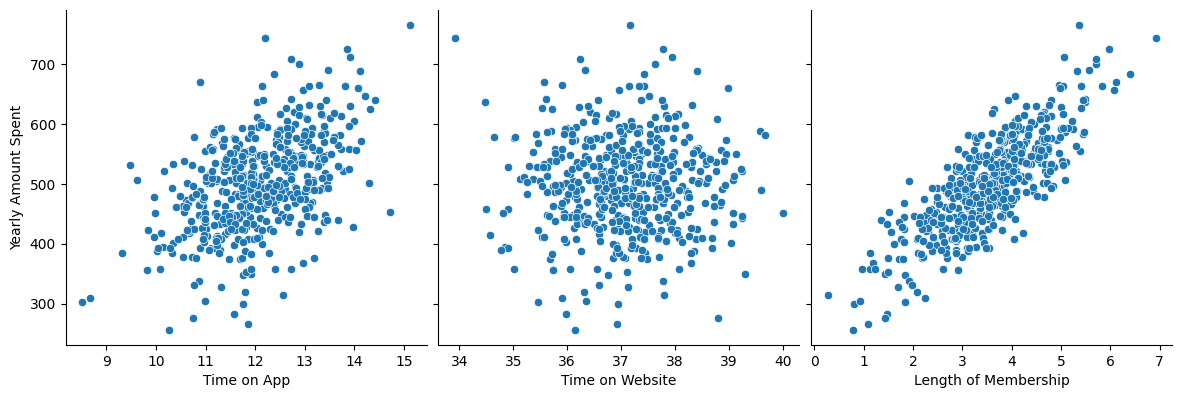

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_col = data.select_dtypes(include=['object']).columns
for col in cat_col:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,342,381,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,190,226,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,355,123,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,391,62,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,341,60,80,33.330673,12.795189,37.536653,4.446308,599.406092


- Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

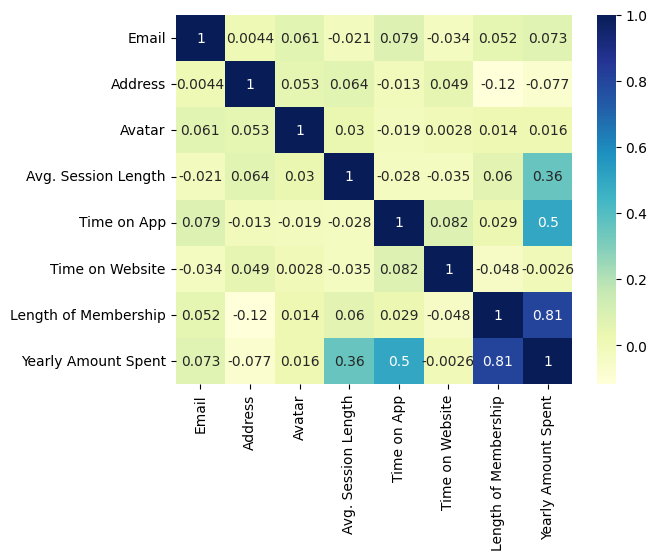

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Langkah 6: Regresi Linier

- Pisahkan variabel bebas (X) dan variabel target (y).

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

- Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.


In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

- Visualisasikan garis regresi pada data latih.

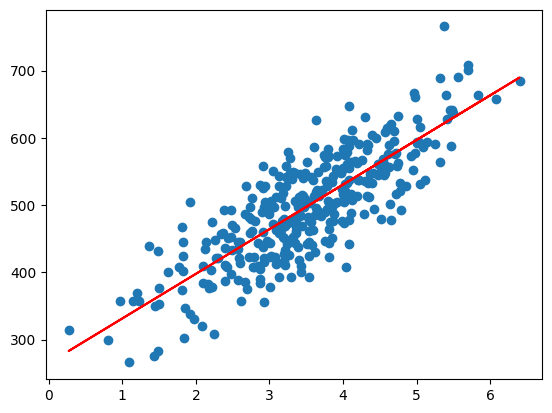

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Langkah 7: Analisis Residual

- Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

- Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


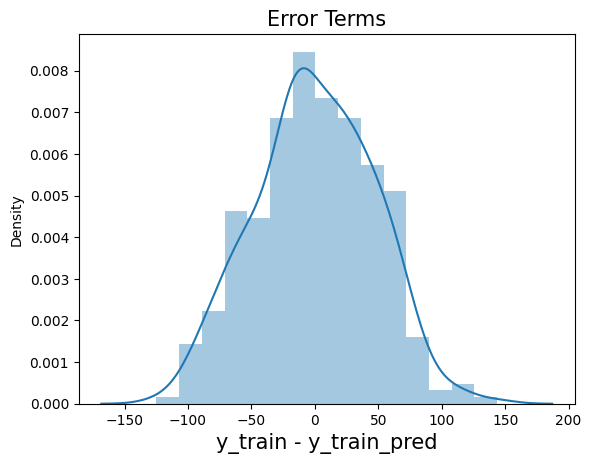

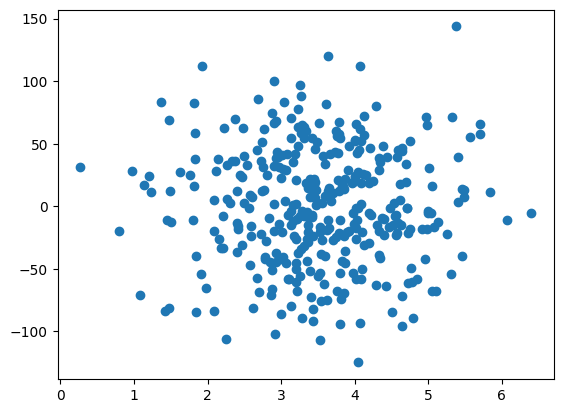

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

### Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

- Lakukan prediksi pada data uji.

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

- Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

### Langkah 9: Visualisasi Hasil

- Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

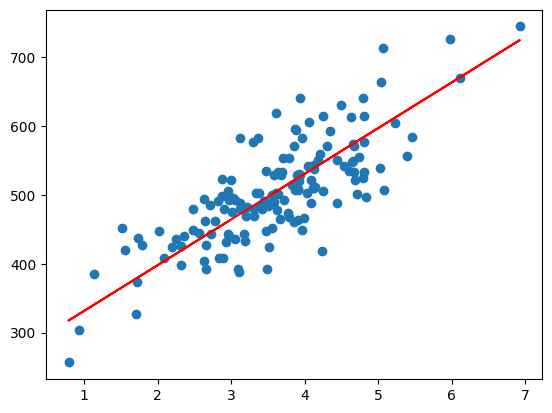

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Praktikum 2 SVR

### Langkah 1 - Import Library
Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Langkah 2 - Load Dataset
- Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.
- Membaca dataset menggunakan `pd.read_csv` dan memilih fitur (variabel independen `X`) dan target (variabel dependen `y`).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

### Langkah 3 - Features Scaling
Menggunakan StandardScaler untuk melakukan penskalaan fitur `X` dan target `y`. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Langkah 4 - Fitting Model SVR
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Langkah 5 - Visualisasi Hasil SVR
langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


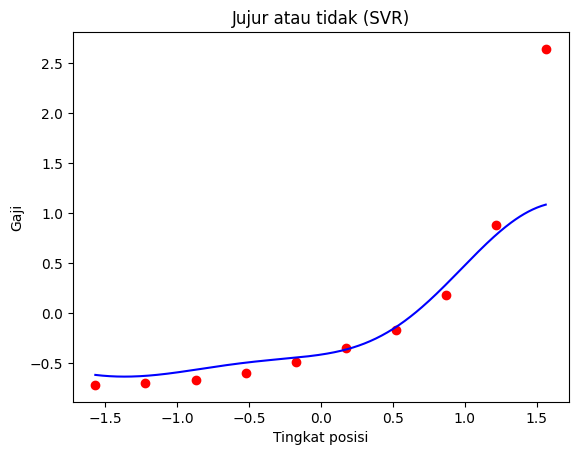

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

### Langkah 6 - Prediksi Hasil
- Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
- Menskalakan fitur prediksi menggunakan `sc_X.transform`.
- Melakukan prediksi menggunakan model SVR yang telah dilatih.
- Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan `sc_y.inverse_transform`.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### Langkah 7 - Menampilkan Hasil
Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### Langkah 8 - Evaluasi Model SVR
Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Tugas Praktikum
### Instruksi Umum:
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

## Catatan Tambahan
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('insurance.csv')

# melihat beberapa data awal
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# mengecek ukuran data
print(f"Ukuran data: {df.shape}")
print("")

# informasi tentang data
df.info()
print("")

# deskripsi data
print("Deskripsi data:")
df.describe()

Ukuran data: (1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Deskripsi data:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Tugas
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).


In [ ]:
# Variabel target (y)
y = df['charges']
# Variabel bebas (X)
X = df.drop(columns=['charges'])

print(f"Variabel Target (y): 'charges'")
print(f"Variabel Bebas (X): {list(X.columns)}")

Variabel Target (y): 'charges'
Variabel Bebas (X): ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {X_train.shape[0]} baris")
print(f"Jumlah data uji: {X_test.shape[0]} baris")

Jumlah data latih: 1070 baris
Jumlah data uji: 268 baris


3. Lakukan feature scaling jika diperlukan.

In [ ]:
# Identifikasi nama kolom numerik dan kategorikal
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Scaling dengan pipeline transformer untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encoding dengan pipeline transformer untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

4. Buat model multiple linear regression menggunakan Scikit-Learn.


In [ ]:
mlr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

5. Latih model pada data latih dan lakukan prediksi pada data uji.


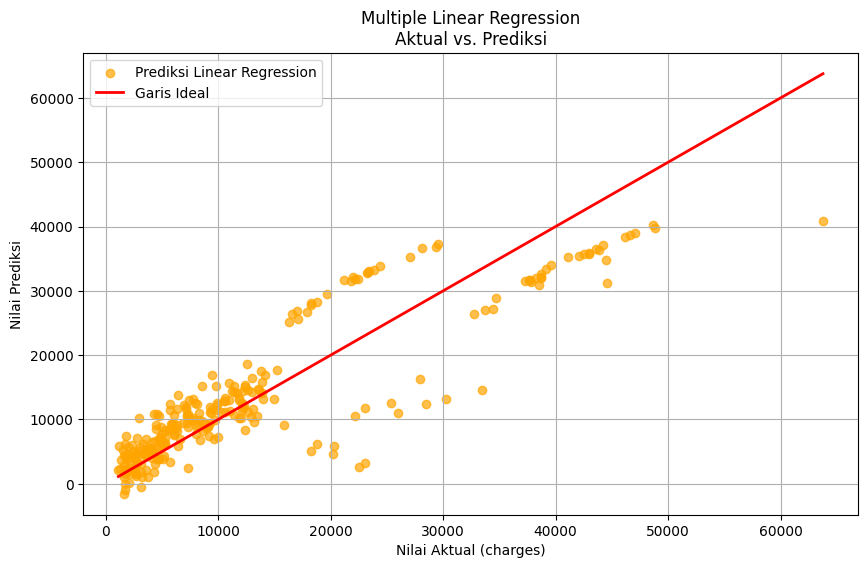

In [ ]:
mlr_pipeline.fit(X_train, y_train)
y_pred_mlr = mlr_pipeline.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_mlr, alpha=0.7, color='orange', label='Prediksi Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Multiple Linear Regression\nAktual vs. Prediksi')
plt.legend()
plt.grid(True)
plt.show()


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


In [ ]:
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

print("=== Evaluasi Model Multiple Linear Regression ===")
print(f"R-squared (R²): {r2_mlr:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_mlr:.4f}")


=== Evaluasi Model Multiple Linear Regression ===
R-squared (R²): 0.7836
Mean Squared Error (MSE): 33596915.8514
Root Mean Squared Error (RMSE): 5796.2847
Mean Absolute Error (MAE): 4181.1945


7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Parameter SVR terbaik: {'model__C': 10000, 'model__gamma': 0.1, 'model__kernel': 'rbf'}


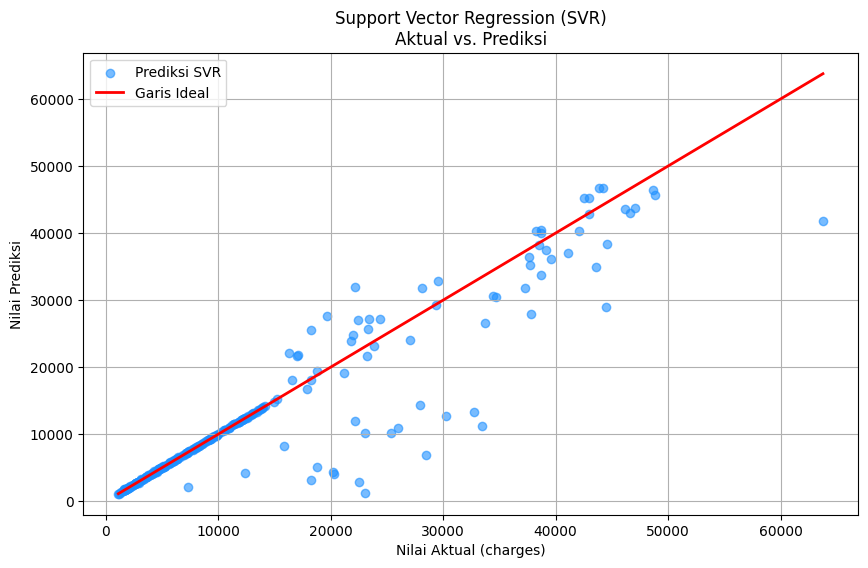

In [ ]:
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Menentukan parameter grid untuk tuning
param_grid = {
    'model__kernel': ['rbf'],
    'model__C': [1000, 5000, 10000], # parameter regularisasi
    'model__gamma': [0.1, 0.01, 0.001] # gamma untuk kernel RBF
}

# GridSearchCV digunakan untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nParameter SVR terbaik: {grid_search.best_params_}")

y_pred_svr = grid_search.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='dodgerblue', label='Prediksi SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Support Vector Regression (SVR)\nAktual vs. Prediksi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("=== Evaluasi Model SVR ===")
results = pd.DataFrame({
    'Model': ['MLR', 'SVR (RBF)'],
    'R2': [r2_mlr, r2_svr],
    'MSE': [mse_mlr, mse_svr],
    'RMSE': [rmse_mlr, rmse_svr],
    'MAE': [mae_mlr, mae_svr]
})
print(results)

=== Evaluasi Model SVR ===
       Model        R2           MSE         RMSE          MAE
0        MLR  0.783593  3.359692e+07  5796.284659  4181.194474
1  SVR (RBF)  0.853740  2.270673e+07  4765.158131  1813.533506


## Analisis Hasil

1. Multiple Linear Regression (MLR):
    - R-squared (R²): 0.7836
    - MAE: 4181.19
    - MSE: 3.3596
    - RMSE: 5796.28
    - Model MLR mampu menjelaskan sekitar 78.36% variasi data. Rata-rata kesalahan prediksinya (MAE) adalah sekitar $4,181.
    - Titik-titik data pada plot MLR terlihat jauh lebih tersebar dan banyak yang berada jauh dari garis diagonal merah (yang merepresentasikan prediksi sempurna).
2. Support Vector Regression (SVR):
    - R-squared (R²): 0.8537
    - MAE: 1813.53
    - MSE: 2.2706
    - RMSE: 4765,15
    - Model SVR, setelah di-tuning, menunjukkan performa yang jauh lebih unggul. Model SVR mampu menjelaskan 85.37% variasi dalam biaya medis. Rata-rata kesalahannya (MAE) hanya $1,813, yang kurang dari setengah kesalahan model MLR.
    - Titik-titik data pada plot SVR terlihat lebih rapat dan berkumpul di sekitar garis diagonal merah.

Kesimpulan:
- Support Vector Regression (SVR) adalah model yang lebih baik untuk dataset `insurance.csv`.
- Plot SVR yang lebih rapat secara visual membuktikan bahwa prediksi model SVR lebih sering mendekati nilai aktualnya dibandingkan dengan model MLR.
- Kernel rbf pada SVR mampu menangkap pola non-linear yang kompleks (misalnya, biaya meroket secara drastis jika seseorang adalah perokok), yang tidak dapat dilakukan oleh model MLR standar.